# Gender equality and ML

## Import libraries

In [5]:
#pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

# Load the data

To use the data: download the data from Kaggle, and unzip the file in a sub-folder called 'data', https://www.kaggle.com/datasets/kaggle/kaggle-survey-2018?resource=download

In [86]:
df = pd.read_csv("data/multipleChoiceResponses.csv")

C:\Udacity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


# Data Preparation

Separate the questions

In [88]:
questions_df = df.iloc[0]
questions_df

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT                          In what industry is your current employer/cont...
Q8                   

Data Exploration

In [89]:
answers_df = df.drop(0, axis=0)
answers_df.head(3)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [90]:
answers_df.shape

(23859, 395)

In [91]:
answers_df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q1_OTHER_TEXT                          object
Q2                                     object
Q3                                     object
Q4                                     object
Q5                                     object
Q6                                     object
Q6_OTHER_TEXT                          object
Q7                                     object
Q7_OTHER_TEXT                          object
Q8                                     object
Q9                                     object
Q10                                    object
Q11_Part_1                             object
Q11_Part_2                             object
Q11_Part_3                             object
Q11_Part_4                             object
Q11_Part_5                             object
Q11_Part_6                             object
Q11_Part_7                             object
Q11_OTHER_TEXT                    

In [92]:
answers_df.describe()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23859,23859,23859,23859,23859,23438,22947,22900,23859,21685,...,23859,1371,6478,2674,2104,3569,1059,2500,520,23859
unique,7641,4,69,12,58,7,13,21,900,19,...,171,1,1,1,1,1,1,1,1,414
top,101,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,-1
freq,31,19430,21738,6159,4716,10855,9430,5253,20603,5584,...,21658,1371,6478,2674,2104,3569,1059,2500,520,21421


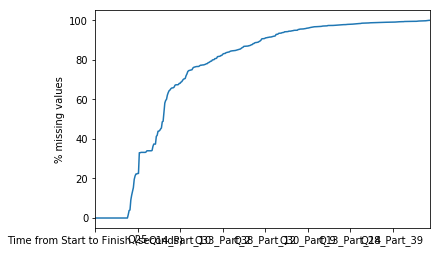

In [93]:
(answers_df.isnull().sum()*100/answers_df.shape[0]).sort_values(ascending=True).plot()
plt.ylabel('% missing values')
plt.show()

# Preparing the Data

## Column selection

In [94]:
questions_df.head(13)

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT                          In what industry is your current employer/cont...
Q8                   

In [95]:
model_df = answers_df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']]
model_df = model_df.rename(columns={
    'Q1': 'Gender', 
    'Q2': 'Age', 
    'Q3': 'Country', 
    'Q4': 'Education', 
    'Q5': 'FieldOfStudies', 
    'Q6': 'JobTitle', 
    'Q7': 'Industry', 
    'Q8': 'Experience', 
    'Q9': 'YearlyCompensation'
})
model_df.head(3)

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,NaN,NaN
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"


# Missing values

In [96]:
model_df = model_df.fillna('Unknown')
model_df.head(3)

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,Other,Unknown,Unknown
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"


In [97]:
model_df.YearlyCompensation.value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
Unknown                                                         3674
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                       

In [98]:
model_df.shape

(23859, 9)

In [99]:
model_df = model_df[
                      (model_df.YearlyCompensation != 'Unknown') 
                    & (model_df.YearlyCompensation != 'I do not wish to disclose my approximate yearly compensation')
                   ]
model_df.head(3)

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000"
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"


In [100]:
model_df.shape

(15429, 9)

# Data types

In [101]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 2 to 23857
Data columns (total 9 columns):
Gender                15429 non-null object
Age                   15429 non-null object
Country               15429 non-null object
Education             15429 non-null object
FieldOfStudies        15429 non-null object
JobTitle              15429 non-null object
Industry              15429 non-null object
Experience            15429 non-null object
YearlyCompensation    15429 non-null object
dtypes: object(9)
memory usage: 1.2+ MB


In [102]:
model_df.Age.value_counts().index

Index(['25-29', '22-24', '30-34', '35-39', '18-21', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70-79', '80+'],
      dtype='object')

In [103]:
# Mapping age and experience to real numbers
exp_map = {
    '0-1': 0.5, '1-2': 1.5, '2-3': 2.5, '3-4':3.5, '4-5':4.5, '5-10': 7.5, 
    '10-15':12.5, '15-20':17.5, '20-25': 22.5, '25-30': 27.5, '30 +': 30, 'Unknown': 0
}
age_map = {
      '18-21': 19.5, '22-24': 23, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42, '45-49': 47, 
      '50-54': 52, '55-59': 57, '60-69': 64.5, '70-79': 74.5, '80+': 80
}
model_df.Age = model_df.Age.map(age_map)
model_df.Experience = model_df.Experience.map(exp_map)
model_df.head(3)

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,32.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,7.5,"10-20,000"
3,Female,32.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0.5,"0-10,000"
5,Male,23.0,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0.5,"0-10,000"


In [104]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 2 to 23857
Data columns (total 9 columns):
Gender                15429 non-null object
Age                   15429 non-null float64
Country               15429 non-null object
Education             15429 non-null object
FieldOfStudies        15429 non-null object
JobTitle              15429 non-null object
Industry              15429 non-null object
Experience            15429 non-null float64
YearlyCompensation    15429 non-null object
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [105]:
num_cols = ['Age', 'Experience']
cat_columns = ['Gender', 'Country', 'Education', 'FieldOfStudies', 'JobTitle', 'Industry']

In [106]:
# Removing strange characters
import re
model_df[cat_columns] = model_df[cat_columns].applymap(lambda x: re.sub('[^A-Za-z0-9_]+', ' ', x))
model_df

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,32.0,Indonesia,Bachelor s degree,Engineering non computer focused,Other,Manufacturing Fabrication,7.5,"10-20,000"
3,Female,32.0,United States of America,Master s degree,Computer science software engineering etc,Data Scientist,I am a student,0.5,"0-10,000"
5,Male,23.0,India,Master s degree,Mathematics or statistics,Data Analyst,I am a student,0.5,"0-10,000"
7,Male,37.0,Chile,Doctoral degree,Information technology networking or system ad...,Other,Academics Education,12.5,"10-20,000"
8,Male,19.5,India,Master s degree,Information technology networking or system ad...,Other,Other,0.5,"0-10,000"
10,Male,32.0,Hungary,Master s degree,Engineering non computer focused,Software Engineer,Online Service Internet based Services,3.5,"20-30,000"
12,Male,42.0,United States of America,Master s degree,Engineering non computer focused,Data Scientist,Other,7.5,"125-150,000"
13,Male,27.0,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0.0,"30-40,000"
14,Male,27.0,United States of America,Bachelor s degree,Mathematics or statistics,Research Assistant,Academics Education,1.5,"30-40,000"
15,Female,27.0,Argentina,Bachelor s degree,A business discipline accounting economics fin...,Data Analyst,Other,1.5,"10-20,000"


In [107]:
# Mapping yearly compensation to numbers
model_df.YearlyCompensation = model_df.YearlyCompensation.map(lambda x: int(x.split('-')[-1].replace(',','').replace('+','')))
model_df.head(3)

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience,YearlyCompensation
2,Male,32.0,Indonesia,Bachelor s degree,Engineering non computer focused,Other,Manufacturing Fabrication,7.5,20000
3,Female,32.0,United States of America,Master s degree,Computer science software engineering etc,Data Scientist,I am a student,0.5,10000
5,Male,23.0,India,Master s degree,Mathematics or statistics,Data Analyst,I am a student,0.5,10000


# Data exploration revisited

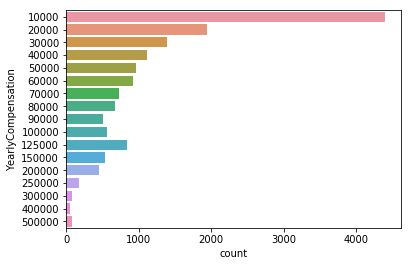

In [108]:
sns.countplot(data=model_df, y='YearlyCompensation');

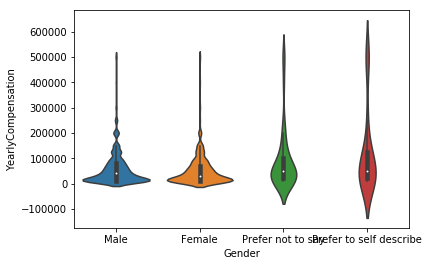

In [109]:
sns.violinplot(data=model_df, x='Gender', y='YearlyCompensation');

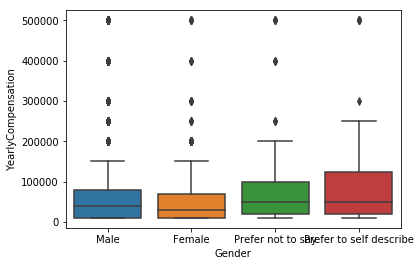

In [110]:
sns.boxplot(data=model_df, x='Gender', y='YearlyCompensation');

# Preprocessing

## Split labels and features

In [111]:
y = model_df.YearlyCompensation
X = model_df.drop(columns=['YearlyCompensation'])

In [112]:
y.head()

2    20000
3    10000
5    10000
7    20000
8    10000
Name: YearlyCompensation, dtype: int64

In [113]:
X.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience
2,Male,32.0,Indonesia,Bachelor s degree,Engineering non computer focused,Other,Manufacturing Fabrication,7.5
3,Female,32.0,United States of America,Master s degree,Computer science software engineering etc,Data Scientist,I am a student,0.5
5,Male,23.0,India,Master s degree,Mathematics or statistics,Data Analyst,I am a student,0.5
7,Male,37.0,Chile,Doctoral degree,Information technology networking or system ad...,Other,Academics Education,12.5
8,Male,19.5,India,Master s degree,Information technology networking or system ad...,Other,Other,0.5


## Train Test split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience
14701,Male,32.0,Brazil,Master s degree,Computer science software engineering etc,Chief Officer,Academics Education,12.5
15416,Female,23.0,I do not wish to disclose my location,Master s degree,Mathematics or statistics,Student,I am a student,4.5
17903,Male,27.0,I do not wish to disclose my location,Master s degree,Computer science software engineering etc,Software Engineer,Manufacturing Fabrication,1.5
3430,Male,32.0,Russia,Master s degree,Computer science software engineering etc,Data Analyst,Accounting Finance,12.5
20566,Male,19.5,Pakistan,Bachelor s degree,Computer science software engineering etc,Chief Officer,Computers Technology,0.5


In [115]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

C:\Udacity\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Udacity\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Udacity\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Gender,Age,Country,Education,FieldOfStudies,JobTitle,Industry,Experience
14701,Male,0.110602,Brazil,Master s degree,Computer science software engineering etc,Chief Officer,Academics Education,1.306253
15416,Female,-0.835637,I do not wish to disclose my location,Master s degree,Mathematics or statistics,Student,I am a student,-0.046567
17903,Male,-0.415086,I do not wish to disclose my location,Master s degree,Computer science software engineering etc,Software Engineer,Manufacturing Fabrication,-0.553875
3430,Male,0.110602,Russia,Master s degree,Computer science software engineering etc,Data Analyst,Accounting Finance,1.306253
20566,Male,-1.203618,Pakistan,Bachelor s degree,Computer science software engineering etc,Chief Officer,Computers Technology,-0.722977


In [116]:
import sklearn as skl
print('The scikit-learn version is {}.'.format(skl.__version__))

The scikit-learn version is 1.0.2.


In [117]:
#pip install -U scikit-learn

In [118]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[cat_columns])

OneHotEncoder(sparse=False)

In [80]:
encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Gender_Prefer not to say',
       'Gender_Prefer to self describe', 'Country_Argentina',
       'Country_Australia', 'Country_Austria', 'Country_Bangladesh',
       'Country_Belarus', 'Country_Belgium', 'Country_Brazil',
       'Country_Canada', 'Country_Chile', 'Country_China',
       'Country_Colombia', 'Country_Czech Republic', 'Country_Denmark',
       'Country_Egypt', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hong Kong S A R ',
       'Country_Hungary', 'Country_I do not wish to disclose my location',
       'Country_India', 'Country_Indonesia',
       'Country_Iran Islamic Republic of ', 'Country_Ireland',
       'Country_Israel', 'Country_Italy', 'Country_Japan',
       'Country_Kenya', 'Country_Malaysia', 'Country_Mexico',
       'Country_Morocco', 'Country_Netherlands', 'Country_New Zealand',
       'Country_Nigeria', 'Country_Norway', 'Country_Other',
       'Country_Pakistan', 'Country_Pe

In [119]:
X_train[cat_columns]

,Gender,Country,Education,FieldOfStudies,JobTitle,Industry
14701,Male,Brazil,Master s degree,Computer science software engineering etc,Chief Officer,Academics Education
15416,Female,I do not wish to disclose my location,Master s degree,Mathematics or statistics,Student,I am a student
17903,Male,I do not wish to disclose my location,Master s degree,Computer science software engineering etc,Software Engineer,Manufacturing Fabrication
3430,Male,Russia,Master s degree,Computer science software engineering etc,Data Analyst,Accounting Finance
20566,Male,Pakistan,Bachelor s degree,Computer science software engineering etc,Chief Officer,Computers Technology
5983,Male,Pakistan,Master s degree,Computer science software engineering etc,Data Scientist,Other
14337,Male,Belgium,Master s degree,A business discipline accounting economics fin...,Student,Computers Technology
3496,Male,France,Doctoral degree,Mathematics or statistics,Research Assistant,Academics Education
18366,Male,China,Master s degree,Engineering non computer focused,Student,Academics Education
9743,Female,Sweden,Doctoral degree,Medical or life sciences biology chemistry med...,Data Scientist,Marketing CRM


In [82]:
#encoder.transform(X_train[cat_columns])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [120]:
X_train[encoder.get_feature_names_out()] =  encoder.transform(X_train[cat_columns])

KeyError: "None of [Index(['Gender_Female', 'Gender_Male', 'Gender_Prefer not to say',\n       'Gender_Prefer to self describe', 'Country_Argentina',\n       'Country_Australia', 'Country_Austria', 'Country_Bangladesh',\n       'Country_Belarus', 'Country_Belgium',\n       ...\n       'Industry_Manufacturing Fabrication', 'Industry_Marketing CRM',\n       'Industry_Medical Pharmaceutical', 'Industry_Military Security Defense',\n       'Industry_Non profit Service',\n       'Industry_Online Business Internet based Sales',\n       'Industry_Online Service Internet based Services', 'Industry_Other',\n       'Industry_Retail Sales', 'Industry_Shipping Transportation'],\n      dtype='object', length=122)] are in the [columns]"

In [121]:
X_test[encoder.get_feature_names_out()] =  encoder.transform(X_test[cat_columns])
X_train.head(3)

KeyError: "None of [Index(['Gender_Female', 'Gender_Male', 'Gender_Prefer not to say',\n       'Gender_Prefer to self describe', 'Country_Argentina',\n       'Country_Australia', 'Country_Austria', 'Country_Bangladesh',\n       'Country_Belarus', 'Country_Belgium',\n       ...\n       'Industry_Manufacturing Fabrication', 'Industry_Marketing CRM',\n       'Industry_Medical Pharmaceutical', 'Industry_Military Security Defense',\n       'Industry_Non profit Service',\n       'Industry_Online Business Internet based Sales',\n       'Industry_Online Service Internet based Services', 'Industry_Other',\n       'Industry_Retail Sales', 'Industry_Shipping Transportation'],\n      dtype='object', length=122)] are in the [columns]"

In [122]:
X_train = X_train.drop(columns=cat_columns)
X_test = X_test.drop(columns=cat_columns)
X_train.head()

,Age,Experience
14701,0.110602,1.306253
15416,-0.835637,-0.046567
17903,-0.415086,-0.553875
3430,0.110602,1.306253
20566,-1.203618,-0.722977


# Train a ML model

In [123]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

## Feature importance

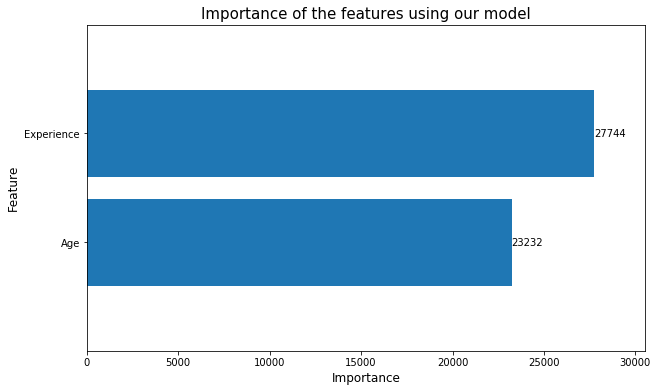

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, max_num_features=30, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title('Importance of the features using our model', fontsize=15)
plt.show()

## Further exploration

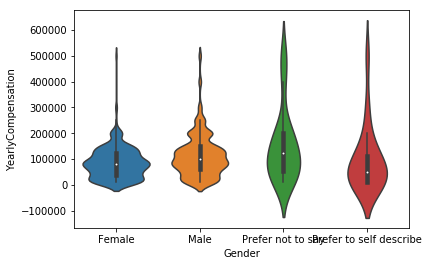

In [125]:
# Country effect
sns.violinplot(data=model_df[model_df.Country=='United States of America'], x='Gender', y='YearlyCompensation');

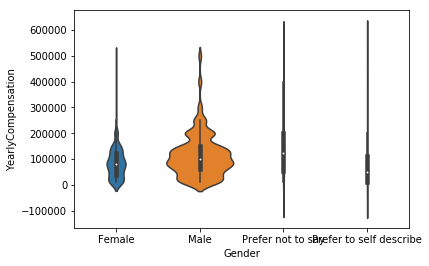

In [126]:
# Size of violins according to number of respondents
sns.violinplot(data=model_df[model_df.Country=='United States of America'], x='Gender', y='YearlyCompensation', scale='count');

In [10]:
form_resp_df = pd.read_csv("data/freeFormResponses.csv")

C:\Udacity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
surv_sch_df = pd.read_csv("data/SurveySchema.csv")

In [12]:
surv_sch_df.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
